In [1]:
#Boris

In [2]:
#My analysis and prediction on Loan Defaults

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('lending_club_loan_two.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
# There are 16 features with 396030 rows

In [7]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [8]:
#EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

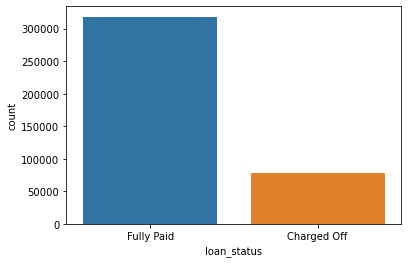

In [9]:
sns.countplot(x = 'loan_status', data= df)

In [10]:
#The data set is an unbalance dataset with most people having paid their loan

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

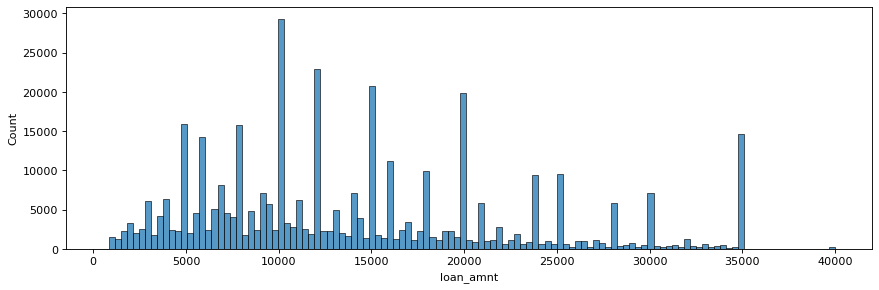

In [11]:
plt.figure(figsize=(13, 4), dpi=80)
sns.histplot(data = df, x = 'loan_amnt')

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

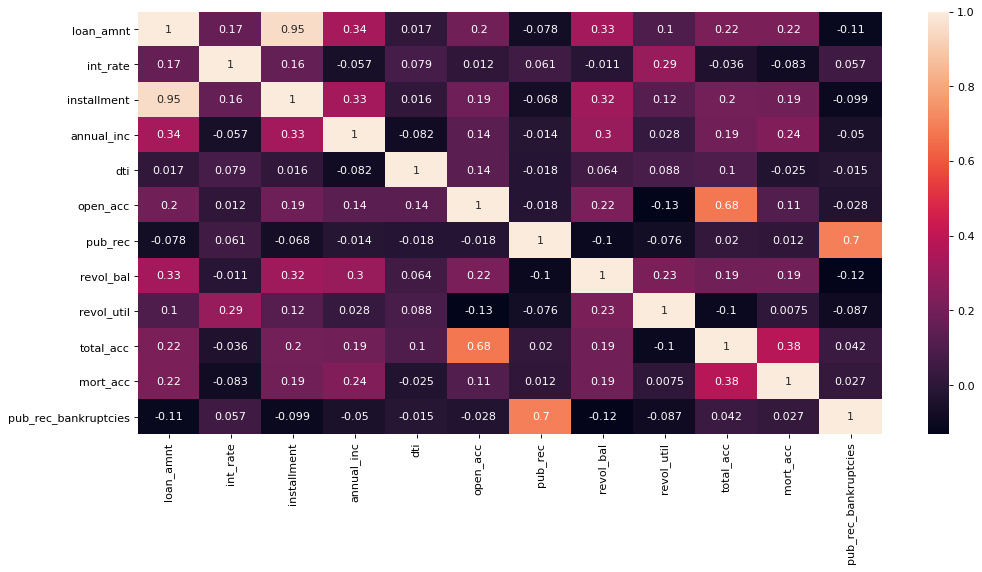

In [13]:
plt.figure(figsize=(15, 7), dpi=80)
sns.heatmap(df.corr(),annot= True)

In [14]:
df.corr()['loan_amnt'].sort_values(ascending=False)

loan_amnt               1.000000
installment             0.953929
annual_inc              0.336887
revol_bal               0.328320
total_acc               0.223886
mort_acc                0.222315
open_acc                0.198556
int_rate                0.168921
revol_util              0.099911
dti                     0.016636
pub_rec                -0.077779
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

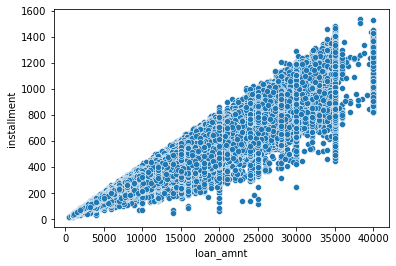

In [15]:
sns.scatterplot(data = df, x = 'loan_amnt', y = 'installment')

In [16]:
#Loan amount and installment are heavy correlated

<AxesSubplot:ylabel='loan_amnt'>

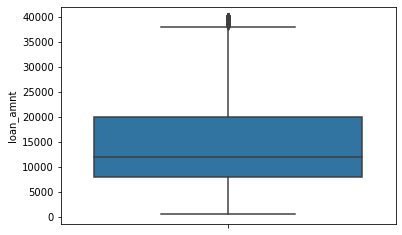

In [17]:
sns.boxplot(data = df, y = 'loan_amnt')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

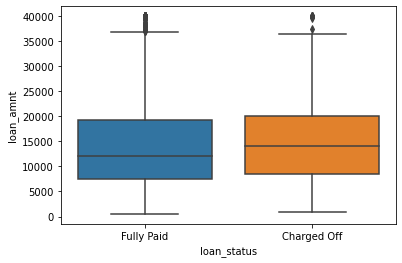

In [18]:
sns.boxplot(data = df, y = 'loan_amnt', x = 'loan_status')

In [19]:
df.groupby(by = 'loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [20]:
df.groupby(by = 'loan_status').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,
Charged Off,15126.300967,15.882587,452.703110,67535.537710,19.656346,11.602513,0.199606,15390.454701,57.869824,24.984152,1.501213,0.128412
Fully Paid,13866.878771,13.092105,426.761866,75829.951566,16.824010,11.240067,0.172966,15955.327918,52.796918,25.519800,1.892836,0.119997


In [21]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [22]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [23]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [24]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [25]:
#Most people had a B grade

<AxesSubplot:xlabel='grade', ylabel='count'>

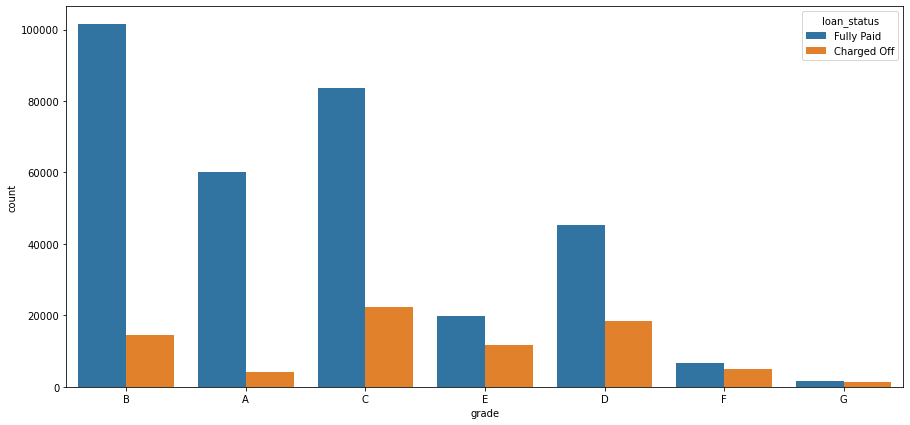

In [26]:
plt.figure(figsize=(15, 7))
sns.countplot(data = df, x = 'grade', hue= 'loan_status')

In [27]:
#People who have A,B,C have fully paid off their loans while people
#With E and D have about 1/3 a chance of paying of their loans.
#There is a  50 percent chance that people 
# with F and G have not paid of their loans 

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

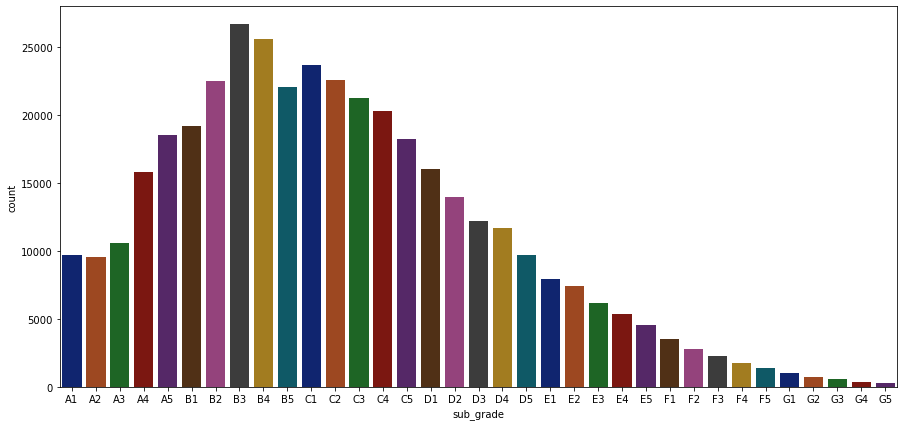

In [28]:
plt.figure(figsize=(15, 7))
sns.countplot(data = df.sort_values('sub_grade'), x = 'sub_grade',palette='dark')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

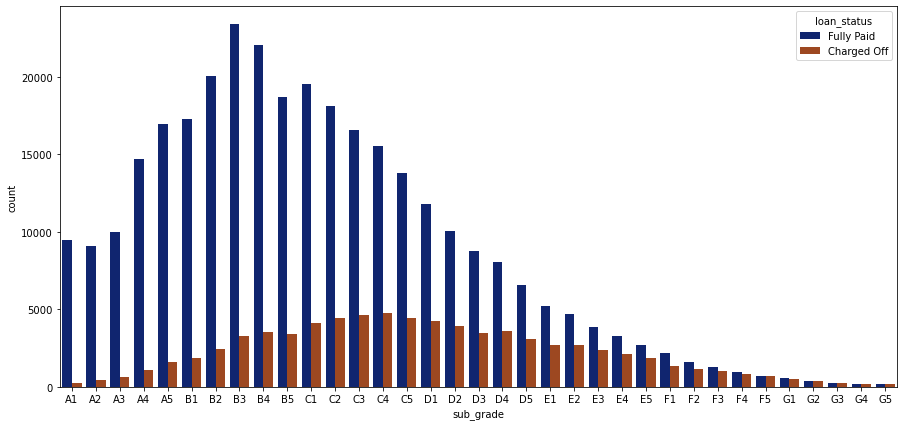

In [29]:
plt.figure(figsize=(15, 7))
sns.countplot(data = df.sort_values('sub_grade'), x = 'sub_grade',palette='dark',hue = 'loan_status')

In [30]:
#I want to explore more on F and G

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

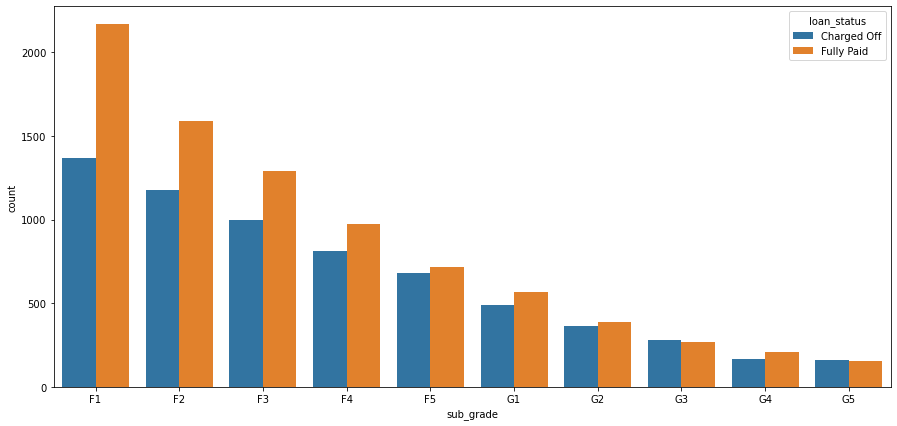

In [31]:
plt.figure(figsize=(15, 7))
df_FG = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
sns.countplot(data = df_FG.sort_values('sub_grade'), x = 'sub_grade',hue = 'loan_status')

In [32]:
def paid(df):
    if df == "Fully Paid":
        return 1
    else:
        return 0

In [33]:
df["loan_repaid"] = df['loan_status'].apply(paid)

In [34]:
df[["loan_repaid",'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

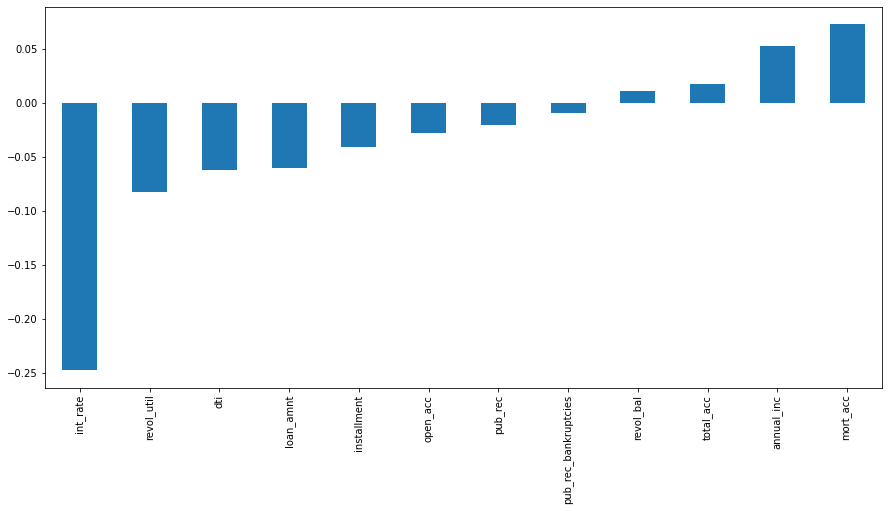

In [35]:
plt.figure(figsize=(15, 7))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [36]:
# We can see that the interest rate is the highest factor that 
# leads to unpaid loans

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [38]:
len(df)

396030

In [39]:
#converted to percentages

In [40]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [41]:
df['emp_title'].value_counts()

Teacher                                 4389
Manager                                 4250
Registered Nurse                        1856
RN                                      1846
Supervisor                              1830
                                        ... 
Jet Ski of Miami                           1
customer save assoc                        1
Entech Staffing Solutions                  1
Manager Quality Assurance Operations       1
GHC LP 08                                  1
Name: emp_title, Length: 173105, dtype: int64

In [42]:
df.drop(['emp_title'],inplace=True, axis = 1)

In [43]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

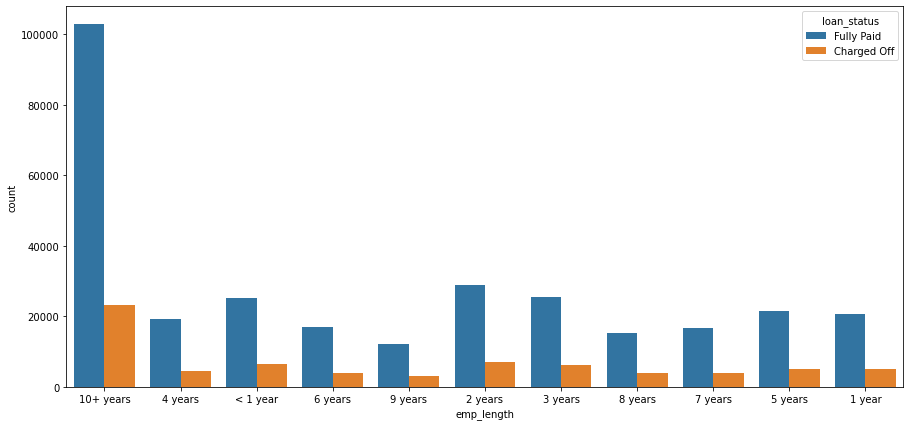

In [44]:
plt.figure(figsize=(15, 7))
sns.countplot(data = df, x = 'emp_length', hue = 'loan_status')

In [45]:
# There does not seem to be a strong correlation between employer length
# and loan status

In [46]:
df.drop('emp_length', inplace= True, axis = 1)

In [47]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [48]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [49]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [50]:
df[['title', 'purpose']].iloc[:10]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


In [51]:
#title seems to be the same as pursose so drop title

In [52]:
df.drop('title', axis = 1, inplace= True)

In [53]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [54]:
df['mort_acc'].mean()

1.8139908160844138

In [55]:
df.groupby('loan_status').mean()['mort_acc']

loan_status
Charged Off    1.501213
Fully Paid     1.892836
Name: mort_acc, dtype: float64

In [56]:
#Most people have no mortage
#people who have fully paid of their loans have a slightly 
# higher average

In [57]:
def mortageCal(mortage,loanRepaid):
    if np.isnan(mortage):
        if loanRepaid == 1:
            return 1.9
        else:
            return 1.5
    return mortage
        

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [59]:
df['mort_acc'] = df.apply(lambda x: mortageCal(x['total_acc'], x['mort_acc']), axis=1)

In [60]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [61]:
df = df.dropna()

In [62]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [63]:
#No more null values

In [64]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [65]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [66]:
df = df.drop('grade',axis=1)

In [67]:
for col in df[df.select_dtypes(['object']).columns]:
    print(f"{col} ")
    print(f"value count \n{df[col].value_counts()}")
    print("\n")

term 
value count 
 36 months    301247
 60 months     93972
Name: term, dtype: int64


sub_grade 
value count 
B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64


home_ownership 
value count 
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64


verification_status 
value count 
Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64


issue_d 
value count 
Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013

In [68]:
#I will perform feature engineering on address, issue_d and earliest_cr_line
#I will use dummy variable directly on the others

In [69]:
# I dropped address, an alternative would be to get the zipcode
# I dropped issue_d because that wold be data leakage
# I dropped loan_status because i created a loan repaid
df.drop(['address','issue_d','loan_status'],inplace=True, axis = 1)

In [70]:
# For earliest_cr_line i will extract the date
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Aug-1959       1
Aug-1962       1
Oct-1961       1
Aug-1958       1
Sep-1960       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [71]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [72]:
for col in df[df.select_dtypes(['object']).columns]:
    print(f"{col} ")
    print(f"value count \n{df[col].value_counts()}")
    print("\n")

term 
value count 
 36 months    301247
 60 months     93972
Name: term, dtype: int64


sub_grade 
value count 
B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64


home_ownership 
value count 
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64


verification_status 
value count 
Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64


purpose 
value count 
debt_consolidation    234169
credit_card            82923
home_improvement      

In [73]:
df = pd.get_dummies(df,drop_first= True )

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 72 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   int_rate                             395219 non-null  float64
 2   installment                          395219 non-null  float64
 3   annual_inc                           395219 non-null  float64
 4   dti                                  395219 non-null  float64
 5   open_acc                             395219 non-null  float64
 6   pub_rec                              395219 non-null  float64
 7   revol_bal                            395219 non-null  float64
 8   revol_util                           395219 non-null  float64
 9   total_acc                            395219 non-null  float64
 10  mort_acc                             395219 non-null  float64
 11  pub_rec_bankr

In [75]:
#I now have 71 features

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [77]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,...,0,0,0,0,0,1,0,1,1,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
X = df.drop('loan_repaid',axis=1)
y = df['loan_repaid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [79]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.28707829, 0.55979743, 0.19639978, ..., 0.        , 1.        ,
        0.        ],
       [0.27434755, 0.48850799, 0.17999774, ..., 1.        , 1.        ,
        0.        ],
       [0.59261617, 0.76626412, 0.45412804, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.15977085, 0.33735878, 0.14551499, ..., 1.        , 1.        ,
        0.        ],
       [0.69446213, 0.31982859, 0.61755124, ..., 1.        , 1.        ,
        0.        ],
       [0.36346276, 0.40085703, 0.33481518, ..., 1.        , 1.        ,
        0.        ]])

In [80]:
logModel = LogisticRegression(max_iter= 1000)
rfcModel = RandomForestClassifier()
svcModel = SVC()

In [81]:
logModel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [82]:
rfcModel.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
logPredictions = logModel.predict(X_test)
rfcPredictions = rfcModel.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
print('Logistic Regression Model \n ')
print(confusion_matrix(y_test, logPredictions))
print(classification_report(y_test, logPredictions))
print('Random Forest Model \n ')
print(confusion_matrix(y_test, rfcPredictions))
print(classification_report(y_test, rfcPredictions))

Logistic Regression Model 
 
[[ 1285 21925]
 [ 1251 94105]]
              precision    recall  f1-score   support

           0       0.51      0.06      0.10     23210
           1       0.81      0.99      0.89     95356

    accuracy                           0.80    118566
   macro avg       0.66      0.52      0.50    118566
weighted avg       0.75      0.80      0.74    118566

Random Forest Model 
 
[[ 1763 21447]
 [ 1646 93710]]
              precision    recall  f1-score   support

           0       0.52      0.08      0.13     23210
           1       0.81      0.98      0.89     95356

    accuracy                           0.81    118566
   macro avg       0.67      0.53      0.51    118566
weighted avg       0.76      0.81      0.74    118566



In [1]:
# Model perfomr reasonbly well given that our dataset was unbalance
#I am use keras too

In [3]:
conda install tensorflow=2.3


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - tensorflow=2.3

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm